# EDA MNIST
We will create a MNIST Dataset in order to try it.

In [23]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from src.classification import ClassificationMNIST
mnist_path = "/mnt/c/BUSDATA/Datasets/MNIST/flat/"

cls_dataset = ClassificationDataset(mnist_path,nmax_per_class=100)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Indexing split train


  2%|▏         | 100/5949 [00:00<00:14, 404.46it/s]


Indexing split test


 10%|▉         | 100/1009 [00:00<00:01, 516.01it/s]


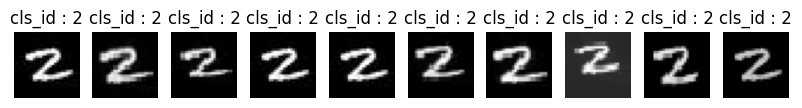

In [26]:
n_img = 10
fig,ax = plt.subplots(1,n_img,figsize=(10,1))

for i in range(n_img):
    img,target,name = cls_dataset[210]
    import matplotlib.pyplot as plt
    img_np = (img.numpy().transpose(1,2,0)+1)*127.5
    ax[i].imshow(img_np)
    ax[i].set_title(f'cls_id : {target}')
    ax[i].axis('off')
plt.show()